# Data merging of FFIEC and UBFR Reports

### Purpose: To get a clean, workable, datafile. 

#### By: Jesus Plascencia 
#### On: Oct 8, 2025

In [4]:
#On Mac
#!pip install missingno
#pip install pyjanitor

#Windows
!pip install missingno pyjanitor




   ------------------------------ --------- 3/4 [pyjanitor]
   ---------------------------------------- 4/4 [pyjanitor]



In [5]:
import pandas as pd
import os
import missingno as msno
import janitor

# Loading Banking data, going from pickle to Parquet
Reading this dataframe is very time consuming, I'm going to use parquet, I might even load in specific snippets just for my mac. It took minutes to load using pickle, now it takes 51 seconds so its more efficient.

Once I fully understand each column I'll load in specific columns. For now, I really want to understand what it is im looking at


In [10]:
#Ask bieri how to make a global path 
df = pd.read_pickle(r"C:\Users\jesus\Desktop\data\bank_data_2002_to_2023.pkl")
#var_def = pd.read_csv(r"C:\Users\jesus\Desktop\VariableDefinitions.csv")

#df = pd.read_parquet(r'/Users/jesusplascencia/Desktop/Indepndent_data/bank_data_2002_to_2023.parquet')



In [13]:
df.head(3)

,Reporting Period End Date,IDRSSD,FDIC Certificate Number,OCC Charter Number,OTS Docket Number,Primary ABA Routing Number,Financial Institution Name,Financial Institution Address,Financial Institution City,Financial Institution State,...,RIADHT69,RIADHT70,RIADHT73,RIADHT74,RCFD2143,RCFDJA22,RCON2143,RCONJJ34,RIADJJ33,RCFDJJ34
0,2002-12-31,37.0,10057.0,0.0,16553.0,61107146.0,BANK OF HANCOCK COUNTY,321 BROAD STREET,SPARTA,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-12-31,242.0,3850.0,0.0,12627.0,81220537.0,FIRST COMMUNITY BANK XENIA-FLORA,FRONT STREET,XENIA,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-12-31,279.0,28868.0,0.0,2523.0,311972526.0,"MINEOLA COMMUNITY BANK, SSB",215 W BROAD,MINEOLA,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

In [ ]:
df.dtypes

In [14]:
col_list= list(df.columns)
print(col_list)

['Reporting Period End Date', 'IDRSSD', 'FDIC Certificate Number', 'OCC Charter Number', 'OTS Docket Number', 'Primary ABA Routing Number', 'Financial Institution Name', 'Financial Institution Address', 'Financial Institution City', 'Financial Institution State', 'Financial Institution Zip Code', 'Financial Institution Filing Type', 'Last Date/Time Submission Updated On', 'RIAD4180', 'RIAD4185', 'RIAD4200', 'RIAD4217', 'RIAD4230', 'RIAD4300', 'RIAD4301', 'RIAD4302', 'RIAD4313', 'RIAD4320', 'RIAD4340', 'RIAD4507', 'RIAD4508', 'RIAD4513', 'RIAD4518', 'RIAD5415', 'RIAD5416', 'RIAD8431', 'RIAD8757', 'RIAD8758', 'RIAD8759', 'RIAD8760', 'RIAD8761', 'RIAD8762', 'RIAD8763', 'RIAD9106', 'RIADA220', 'RIADA251', 'RIADA517', 'RIADA518', 'RIADA530', 'RIADB485', 'RIADB486', 'RIADB487', 'RIADB488', 'RIADB489', 'RIADB490', 'RIADB491', 'RIADB492', 'RIADB493', 'RIADB494', 'RIADB496', 'RIADB497', 'RIADC216', 'RIADC232', 'RCFD0071', 'RCFD0081', 'RCFD0426', 'RCFD1248', 'RCFD1249', 'RCFD1250', 'RCFD1251', '

In [15]:
reviewing_na = df.isna().mean().sort_values(ascending=False)
reviewing_na.head(10)



RIADFT36    0.998645
RIADFT37    0.998645
RIADFT38    0.998643
RIADFT40    0.998643
RIADFT39    0.998643
RIADK094    0.998609
RIADK090    0.998609
RCFDJJ34    0.997241
RCFDJA22    0.996938
RCFD2143    0.996858
dtype: float64

#### Variables have nots of NaN, understanding the data w/defintions

Date column is currently an object I'm just making sure the dataset is in the correct format for me to do analysis 

In [16]:
print(df.isna().sum())

print(df['Last Date/Time Submission Updated On'].dtypes)



Reporting Period End Date         0
IDRSSD                            0
FDIC Certificate Number           0
OCC Charter Number                0
OTS Docket Number                 0
                              ...  
RCFDJA22                     589304
RCON2143                     476864
RCONJJ34                     493214
RIADJJ33                     491583
RCFDJJ34                     589483
Length: 630, dtype: int64
object


In [17]:
df['Last Date/Time Submission Updated On'].head(10)

0    2005-08-08T16:16:33
1    2005-08-08T16:16:33
2    2005-08-08T16:16:33
3    2005-08-08T16:16:33
4    2005-08-08T16:16:33
5    2005-08-08T16:16:33
6    2005-08-08T16:16:33
7    2005-08-08T16:16:33
8    2005-08-08T16:16:33
9    2005-08-08T16:16:33
Name: Last Date/Time Submission Updated On, dtype: object

#### Converting from object to a timestamp

In [19]:
df['date'] = pd.to_datetime(df['Last Date/Time Submission Updated On'], yearfirst=True)
df['date'].dtype

dtype('<M8[ns]')

In [20]:
df['date'].head(1)

0   2005-08-08 16:16:33
Name: date, dtype: datetime64[ns]

**Range of the data**

In [21]:
df.date.min(),df.date.max()

(Timestamp('2005-08-05 02:06:21'), Timestamp('2024-10-11 16:17:56'))

In [22]:
print(f"""
Date: {df.date.iloc[0]}
Day of year: {df.date.dt.day_of_year.iloc[0]}
Day of week: {df.date.dt.dayofweek.iloc[0]}
Month: {df.date.dt.month.iloc[0]}
Month Name: {df.date.dt.month_name().iloc[0]}
Quarter: {df.date.dt.quarter.iloc[0]}
Year: {df.date.dt.year.iloc[0]}
ISO Week: {df.date.dt.isocalendar().week.iloc[0]}
""")


Date: 2005-08-08 16:16:33
Day of year: 220
Day of week: 0
Month: 8
Month Name: August
Quarter: 3
Year: 2005
ISO Week: 32



**missing values?**

In [23]:
df['RIADHT70'] = pd.to_numeric(df['RIADHT70'], errors='coerce')

df['RIADHT70'].dtype

dtype('float64')

C:\Users\jesus\anaconda3\Lib\site-packages\missingno\missingno.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_array = pd.date_range(df.index[0], df.index[-1],
C:\Users\jesus\anaconda3\Lib\site-packages\missingno\missingno.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_ticks = pd.date_range(df.index[0], df.index[-1],
C:\Users\jesus\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\jesus\anaconda3\Lib\ast.py:602: DeprecationWarning: Constant.__init__ got an unexpected keyword argument 's'. Support for arbitrary keyword arguments is deprecated and will be removed in Python 3.15.
  return Constant(*args, **kwargs)
C:\Users\jesus\anaconda3\Lib\ast.py:602: DeprecationWarning: Attribute s is deprecated and will be remove

KeyError: 'Could not divide time index into desired frequency.'

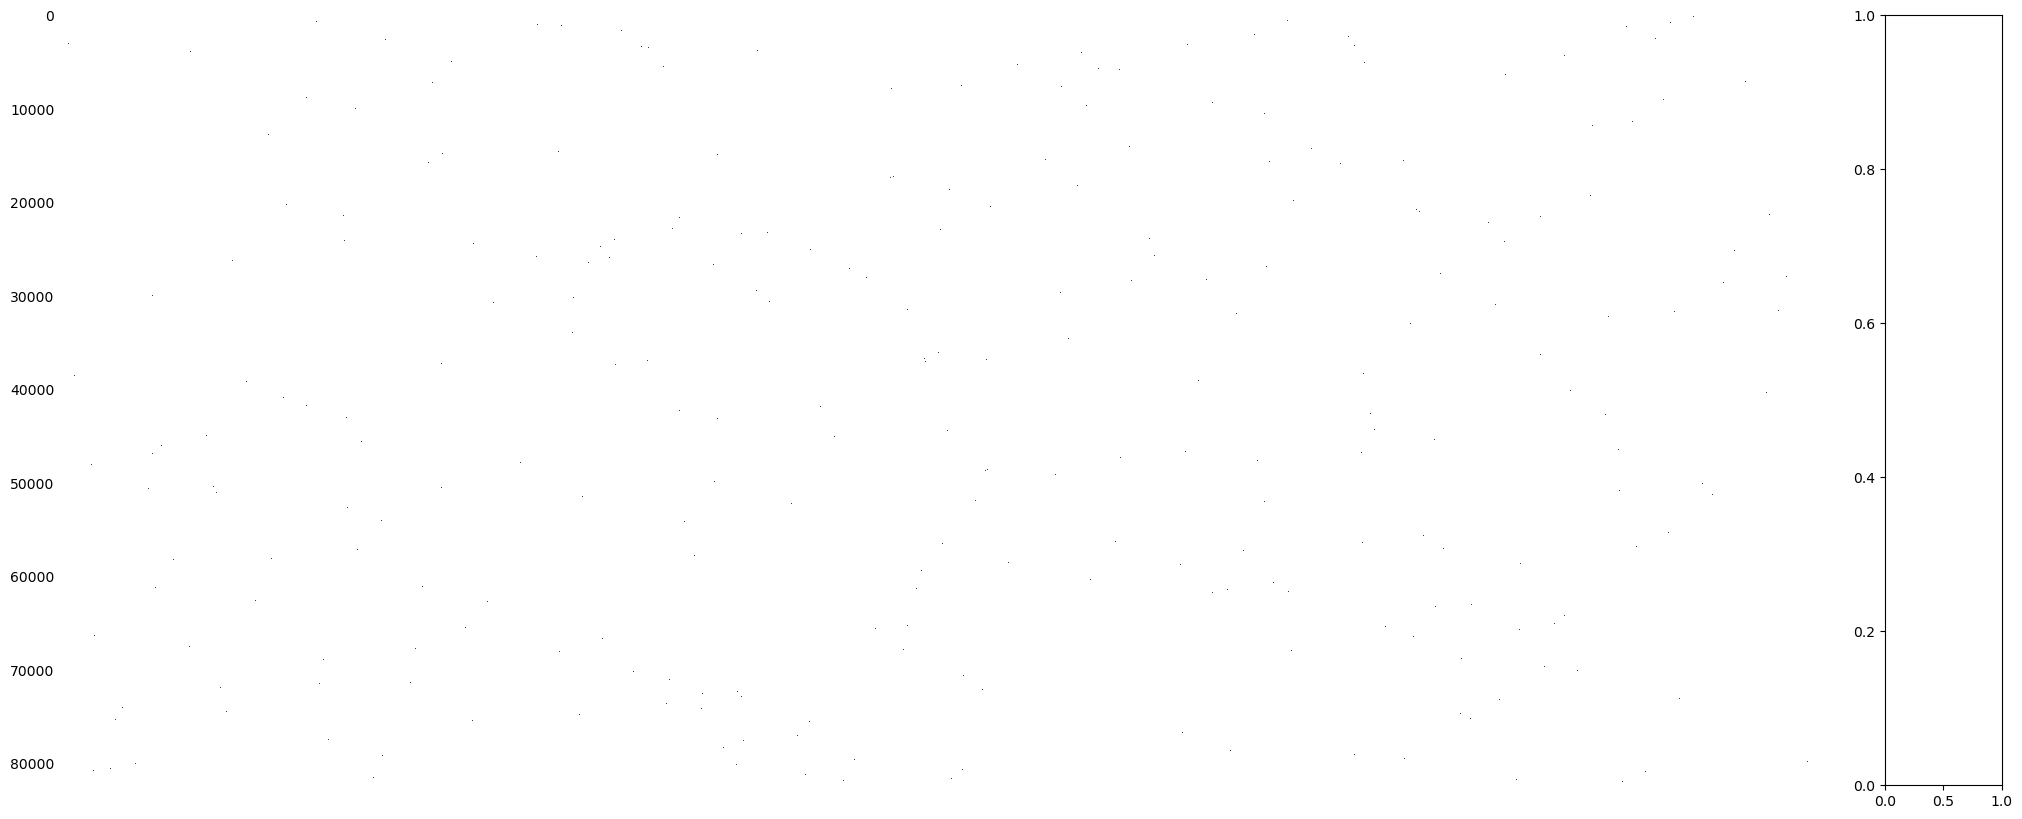

In [24]:

plot_df = pd.pivot_table(df, index="date", columns="IDRSSD", values="RIADHT70")
# Generate Plot. Since we have a datetime index, we can mention the frequency to decide what do we want on the X axis
msno.matrix(plot_df, freq="M", fontsize=20)
#plt.savefig('imgs/chapter_2/missing_no_full.png', bbox_inches='tight')
plt.show()

# Loading Bank Failures --> Creating Dummy Variables and mergiing

In [27]:
df_failures = pd.read_csv(r'C:\Users\jesus\Desktop\data\Banking Failures.csv')

In [28]:
df_failures.head(10) 

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Pulaski Savings Bank,Chicago,IL,28611,Millennium Bank,17-Jan-25,10548
1,First National Bank of Lindsay,Lindsay,OK,4134,First Bank & Trust Co.,18-Oct-24,10547
2,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",26-Apr-24,10546
3,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,3-Nov-23,10545
4,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
5,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
6,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
7,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,10-Mar-23,10539
8,Almena State Bank,Almena,KS,15426,Equity Bank,23-Oct-20,10538
9,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",16-Oct-20,10537


In [29]:
df['Financial Institution Name'].unique()

array(['BANK OF HANCOCK COUNTY', 'FIRST COMMUNITY BANK XENIA-FLORA',
       'MINEOLA COMMUNITY BANK, SSB', ...,
       'TIAA TRUST, NATIONAL ASSOCIATION', 'COMMUNITY UNITY BANK',
       'CONNECTIONS BANK MIDWEST'], dtype=object)

In [30]:
df['Financial Institution City'].unique()

array(['SPARTA', 'XENIA', 'MINEOLA', ..., 'FLOWOOD', 'BEE CAVE', 'GAS'],
      dtype=object)

In [31]:
#print(df_failures['city_'].unique())

In [32]:
df_failures.isna().sum()   

Bank Name                 0
City                      0
State                     0
Cert                      0
Acquiring Institution     0
Closing Date              0
Fund                      0
dtype: int64

In [33]:
df_failures.dtypes

Bank Name                 object
City                      object
State                     object
Cert                       int64
Acquiring Institution     object
Closing Date              object
Fund                       int64
dtype: object

In [34]:
print(df_failures.columns)

Index(['Bank Name ', 'City ', 'State ', 'Cert ', 'Acquiring Institution ',
       'Closing Date ', 'Fund'],
      dtype='object')


In [35]:
print(df.columns)

Index(['Reporting Period End Date', 'IDRSSD', 'FDIC Certificate Number',
       'OCC Charter Number', 'OTS Docket Number', 'Primary ABA Routing Number',
       'Financial Institution Name', 'Financial Institution Address',
       'Financial Institution City', 'Financial Institution State',
       ...
       'RIADHT70', 'RIADHT73', 'RIADHT74', 'RCFD2143', 'RCFDJA22', 'RCON2143',
       'RCONJJ34', 'RIADJJ33', 'RCFDJJ34', 'date'],
      dtype='object', length=631)


### I got tired of cleaning the names so I cheated and used Janitor function

In [36]:
df_failures = df_failures.clean_names()

In [37]:
list(df_failures.columns) 

['bank_name_',
 'city_',
 'state_',
 'cert_',
 'acquiring_institution_',
 'closing_date_',
 'fund']

### Cert and FDIC Certificate Number May be the best way to merge the datasets

It definetely is the best way based off the overlapping Identifyers

In [38]:
cert_uniq = list(df_failures['cert_'].unique())
certifiace_number_uniq = list(df_failures['cert_'].unique())

In [39]:
len(certifiace_number_uniq)
len(cert_uniq)



571

In [40]:
overlapping_certs = []
for i in cert_uniq:
    if i in certifiace_number_uniq:
        overlapping_certs.append(i)

len(overlapping_certs)

571

### Left merge to keep failing banks and those that arent failing, I also will make a dummy variable and based off that I'll begin analyzing "variable definitions" thorughly to identify a sound way to approach our main objective

In [41]:
df_failed_banks = pd.merge(df, df_failures, left_on='FDIC Certificate Number', right_on='cert_')

In [43]:
df_failed_banks.shape

(16623, 638)

In [44]:
df_merged =  pd.merge(df, df_failures, left_on='FDIC Certificate Number', right_on='cert_', how = 'left')

In [89]:
df.shape

(591114, 633)

In [90]:
df_merged.shape


(591114, 640)

In [49]:
failed_certs_dummy_nonunique = df_failures['cert_'].dropna().astype(int)
failed_certs_dummy_unique = failed_certs_dummy_nonunique.unique()

df['failed_banks'] = df['FDIC Certificate Number'].isin(failed_certs_dummy_unique).astype(int)


In [50]:
df_merged['failed_banks'] = df_merged['FDIC Certificate Number'].isin(failed_certs_dummy_unique).astype(int)


In [51]:
print(df.shape)
print(df_failures.shape)
print(df_merged.shape)


(591114, 632)
(571, 7)
(591114, 639)


In [52]:
len(df_merged[df_merged['failed_banks'] == 1])
df_failed_banks.shape


(16623, 638)

In [53]:
print(list(df.columns))

['Reporting Period End Date', 'IDRSSD', 'FDIC Certificate Number', 'OCC Charter Number', 'OTS Docket Number', 'Primary ABA Routing Number', 'Financial Institution Name', 'Financial Institution Address', 'Financial Institution City', 'Financial Institution State', 'Financial Institution Zip Code', 'Financial Institution Filing Type', 'Last Date/Time Submission Updated On', 'RIAD4180', 'RIAD4185', 'RIAD4200', 'RIAD4217', 'RIAD4230', 'RIAD4300', 'RIAD4301', 'RIAD4302', 'RIAD4313', 'RIAD4320', 'RIAD4340', 'RIAD4507', 'RIAD4508', 'RIAD4513', 'RIAD4518', 'RIAD5415', 'RIAD5416', 'RIAD8431', 'RIAD8757', 'RIAD8758', 'RIAD8759', 'RIAD8760', 'RIAD8761', 'RIAD8762', 'RIAD8763', 'RIAD9106', 'RIADA220', 'RIADA251', 'RIADA517', 'RIADA518', 'RIADA530', 'RIADB485', 'RIADB486', 'RIADB487', 'RIADB488', 'RIADB489', 'RIADB490', 'RIADB491', 'RIADB492', 'RIADB493', 'RIADB494', 'RIADB496', 'RIADB497', 'RIADC216', 'RIADC232', 'RCFD0071', 'RCFD0081', 'RCFD0426', 'RCFD1248', 'RCFD1249', 'RCFD1250', 'RCFD1251', '

In [55]:
df_merged.to_parquet(r"C:\Users\jesus\Desktop\data\bank_data_failed.parquet")


In [56]:
test = pd.read_parquet(r"C:\Users\jesus\Desktop\data\bank_data_failed.parquet")

In [57]:
test.shape

(591114, 639)

## Now adding the banks that went inactive for any reason

In [58]:
df_inactive = pd.read_csv(r"C:\Users\jesus\Desktop\data\BanksEndBeforeDate.csv")


In [59]:
df_inactive.head(10)

,name,city,state,cert,id_number,end_date,Unnamed: 6
0,PEOPLES BANK,BLACKSHEAR,GA,16498,439,2007-06-30 00:00:00,NaN
1,PULASKI BANK AND TRUST COMPANY,LITTLE ROCK,AR,17562,1146,2007-03-31 00:00:00,NaN
2,FIRST STATE BANK KIOWA KANSAS THE,KIOWA,KS,15328,1557,2017-12-31 00:00:00,NaN
3,SEA ISLAND BANK,STATESBORO,GA,5707,1632,2010-03-31 00:00:00,NaN
4,ALLEGHENY VALLEY BANK OF PITTSBURGH,PITTSBURGH,PA,6058,1829,2017-03-31 00:00:00,NaN
5,FARMERS & MERCHANTS BANK,TOMAH,WI,13046,2040,2019-06-30 00:00:00,NaN
6,ORITANI SAVINGS BANK,HACKENSACK,NJ,28866,2376,2019-09-30 00:00:00,NaN
7,BEVERLY STATE BANK,BEVERLY,KS,10506,2451,2010-06-30 00:00:00,NaN
8,STATE BANK OF MARIETTA,MARIETTA,MN,18525,2554,2019-03-31 00:00:00,NaN
9,SECURITY BANK AND TRUST COMPANY OF ALBANY,ALBANY,GA,20246,2938,2010-03-31 00:00:00,NaN


In [60]:
df_inactive.dtypes

name           object
city           object
state          object
cert            int64
id_number       int64
end_date       object
Unnamed: 6    float64
dtype: object

In [61]:
df_inactive.info

<bound method DataFrame.info of                                           name         city state   cert  \
0                                 PEOPLES BANK   BLACKSHEAR    GA  16498   
1               PULASKI BANK AND TRUST COMPANY  LITTLE ROCK    AR  17562   
2         FIRST STATE BANK  KIOWA  KANSAS  THE        KIOWA    KS  15328   
3                              SEA ISLAND BANK   STATESBORO    GA   5707   
4          ALLEGHENY VALLEY BANK OF PITTSBURGH   PITTSBURGH    PA   6058   
...                                        ...          ...   ...    ...   
5803                       NEW TRADITIONS BANK      ORLANDO    FL  58822   
5804            INVESCO NATIONAL TRUST COMPANY      ATLANTA    GA  59078   
5805                       BANK OF AUSTIN  THE       AUSTIN    TX  59104   
5806                            BLUE GATE BANK   COSTA MESA    CA  59094   
5807  PEAK TRUST COMPANY  NATIONAL ASSOCIATION    ANCHORAGE    AK  59322   

      id_number             end_date  Unnamed: 6  
0   

### I noticed that my final dataset was producing duplicate results. 

In [98]:
duplicate_mask = df_inactive['cert'].duplicated(keep=False)

# Filter only the duplicated ones
df_inactive_duplicates = df_inactive[duplicate_mask]

# See how many duplicates exist
print("Total duplicated rows:", len(df_inactive_duplicates))
print("Unique duplicate certs:", df_inactive['cert'].nunique())

Total duplicated rows: 42
Unique duplicate certs: 5787


In [99]:
df_inactive_nodupes = df_inactive.drop_duplicates(subset =['cert'])

In [100]:
df_inactive_nodupes.shape

(5787, 7)

#### Cert has no NaN 

In [103]:
df_inactive.isna().sum()

name             0
city             0
state            0
cert             0
id_number        0
end_date         0
Unnamed: 6    5808
dtype: int64

In [63]:
df_inactive.columns

Index(['name', 'city', 'state', 'cert', 'id_number', 'end_date', 'Unnamed: 6'], dtype='object')

In [64]:
df.describe()

,Reporting Period End Date,IDRSSD,FDIC Certificate Number,OCC Charter Number,OTS Docket Number,Primary ABA Routing Number,Financial Institution Zip Code,Financial Institution Filing Type,RIADHT70,date,failed_banks
count,591114,5.911140e+05,591114.000000,591114.000000,591114.000000,5.911140e+05,5.911140e+05,591114.000000,8.233800e+04,591114,591114.000000
mean,2011-12-20 10:04:41.147799040,1.012928e+06,21049.988929,24016.094428,4402.678644,9.853230e+07,3.548824e+07,42.572032,7.835635e+01,2012-06-16 07:23:54.787003904,0.028121
min,2002-03-31 00:00:00,3.700000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,31.000000,-2.074000e+06,2005-08-05 02:06:21,0.000000
25%,2006-06-30 00:00:00,3.287770e+05,8852.000000,0.000000,0.000000,6.700044e+07,3.764300e+04,41.000000,0.000000e+00,2006-10-16 09:19:37.750000128,0.000000
50%,2011-06-30 00:00:00,6.589240e+05,16472.000000,0.000000,0.000000,8.430301e+07,5.710400e+04,41.000000,0.000000e+00,2011-08-29 15:51:56.500000,0.000000
75%,2016-12-31 00:00:00,9.786590e+05,29430.000000,0.000000,10686.000000,1.110245e+08,7.205800e+04,41.000000,0.000000e+00,2017-02-02 16:07:34,0.000000
max,2023-12-31 00:00:00,5.860740e+06,91385.000000,718184.000000,80861.000000,3.252713e+08,9.936204e+08,51.000000,9.860000e+05,2024-10-11 16:17:56,1.000000
std,NaN,1.035594e+06,17122.238628,120011.383852,6603.031598,5.854406e+07,1.526362e+08,4.026490,9.311870e+03,NaN,0.165320


In [104]:
 df_bank_failure_inactive= pd.merge(df_merged, df_inactive_nodupes, left_on='FDIC Certificate Number', right_on='cert', how = 'left')

In [105]:
print("Before merge:", len(df_merged))
print("After merge:", len(df_bank_failure_inactive))
print("Unique banks before:", df_merged['FDIC Certificate Number'].nunique())
print("Unique banks after:", df_bank_failure_inactive['FDIC Certificate Number'].nunique())


Before merge: 591114
After merge: 591114
Unique banks before: 10431
Unique banks after: 10431


In [71]:
df.shape

(591114, 633)

In [73]:
df_failed_banks.shape

(16623, 638)

In [72]:
df_merged.shape

(591114, 640)

In [69]:
df_inactive.shape

(5808, 7)

In [68]:
 df_bank_failure_inactive.shape

(591902, 646)

In [106]:
inactive_certs_dummy_nonunique = df_inactive['cert'].dropna().astype(int)
inactive_certs_dummy_unique = inactive_certs_dummy_nonunique.unique()

df_bank_failure_inactive['inactive_banks'] = df_bank_failure_inactive['FDIC Certificate Number'].isin(inactive_certs_dummy_unique).astype(int)



### I did a sanity check to make sure everything made sense and so far everything looks good

In [112]:
df_bank_failure_inactive.loc[df_bank_failure_inactive['inactive_banks'] == 1, 'FDIC Certificate Number'].nunique()
df_inactive_nodupes.shape

(5787, 7)

In [115]:
#Mac
#df_bank_failure_inactive.to_parquet(r'/Users/jesusplascencia/Desktop/Indepndent_data/bank_data_failed_inactive.parquet')

#Windows
df_bank_failure_inactive.to_parquet(r"C:\Users\jesus\Desktop\data\bank_data_failed_inactive.parquet")



C:\Users\jesus\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\jesus\anaconda3\Lib\ast.py:602: DeprecationWarning: Constant.__init__ got an unexpected keyword argument 's'. Support for arbitrary keyword arguments is deprecated and will be removed in Python 3.15.
  return Constant(*args, **kwargs)
C:\Users\jesus\anaconda3\Lib\ast.py:602: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\jesus\anaconda3\Lib\ast.py:602: DeprecationWarning: Constant.__init__ missing 1 required positional argument: 'value'. This will become an error in Python 3.15.
  return Constant(*args, **kwargs)
C:\Users\jesus\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instea

KeyboardInterrupt: 

In [116]:
df_bank_failure_inactive.shape

(591114, 647)

In [118]:
df_bank_failure_inactive.columns

Index(['Reporting Period End Date', 'IDRSSD', 'FDIC Certificate Number',
       'OCC Charter Number', 'OTS Docket Number', 'Primary ABA Routing Number',
       'Financial Institution Name', 'Financial Institution Address',
       'Financial Institution City', 'Financial Institution State',
       ...
       'fund', 'failed_banks', 'inactive_banks', 'name', 'city', 'state',
       'cert', 'id_number', 'end_date', 'Unnamed: 6'],
      dtype='object', length=647)

In [121]:
(df_bank_failure_inactive['FDIC Certificate Number'] == df_bank_failure_inactive['cert']).value_counts(dropna=False)


False    379844
True     211270
Name: count, dtype: int64

In [77]:
len(df_merged[df_merged['failed_banks'] == 1])


16623

In [78]:
len(df_bank_failure_inactive[df_bank_failure_inactive['failed_banks'] == 1])


16667

In [79]:
len(df_bank_failure_inactive[df_bank_failure_inactive['inactive_banks'] == 1])
---

212058

In [ ]:
## Df Inactive shape is (5808,7) but when we merged we have 21,2058 inactive banks. The problem is that banks repeat. 

In [81]:
inactive_unique_banks = df_bank_failure_inactive.loc[
    df_bank_failure_inactive['inactive_banks'] == 1, 
    'FDIC Certificate Number'
].nunique()

inactive_unique_banks

5787

In [84]:
bank_counts = (
    df_bank_failure_inactive['FDIC Certificate Number']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'FDIC Certificate Number', 'FDIC Certificate Number': 'row_count'})
)


In [85]:
bank_counts['row_count'].describe()


count    10431.000000
mean     23343.843927
std      17693.147027
min          0.000000
25%       9971.500000
50%      19006.000000
75%      33275.000000
max      91385.000000
Name: row_count, dtype: float64

In [86]:
banks_multiple = bank_counts[bank_counts['row_count'] > 1]
len(banks_multiple)

10430

In [123]:
failed_and_inactive = df_bank_failure_inactive[
    (df_bank_failure_inactive['failed_banks'] == 1) &
    (df_bank_failure_inactive['inactive_banks'] == 1)
]

,Reporting Period End Date,IDRSSD,FDIC Certificate Number,OCC Charter Number,OTS Docket Number,Primary ABA Routing Number,Financial Institution Name,Financial Institution Address,Financial Institution City,Financial Institution State,...,fund,failed_banks,inactive_banks,name,city,state,cert,id_number,end_date,Unnamed: 6
19,2002-12-31,2451.0,10506.0,0.0,15933.0,101106667.0,BEVERLY STATE BANK,FIRST AND MAIN,BEVERLY,KS,...,10269.0,1,1,BEVERLY STATE BANK,BEVERLY,KS,10506.0,2451.0,2010-06-30 00:00:00,NaN
30,2002-12-31,3953.0,416.0,0.0,17888.0,103100409.0,FIRST CAPITAL BANK,224 EAST OKLAHOMA,GUTHRIE,OK,...,10443.0,1,1,FIRST CAPITAL BANK,GUTHRIE,OK,416.0,3953.0,2012-03-31 00:00:00,NaN
105,2002-12-31,15536.0,11677.0,0.0,17817.0,71001041.0,PULLMAN BANK AND TRUST COMPANY,1000 EAST 111TH STREET,CHICAGO,IL,...,10140.0,1,1,PULLMAN BANK AND TRUST COMPANY,CHICAGO,IL,11677.0,15536.0,2009-09-30 00:00:00,NaN
107,2002-12-31,16337.0,21777.0,0.0,15172.0,63109702.0,WAKULLA BANK,2932 CRAWFORDVILLE HIGHWAY,CRAWFORDVILLE,FL,...,10296.0,1,1,WAKULLA BANK,CRAWFORDVILLE,FL,21777.0,16337.0,2010-09-30 00:00:00,NaN
138,2002-12-31,20370.0,23626.0,0.0,11449.0,125107875.0,FIRST HERITAGE BANK,167 LINCOLN AVENUE,SNOHOMISH,WA,...,10368.0,1,1,FIRST HERITAGE BANK,SNOHOMISH,WA,23626.0,20370.0,2011-03-31 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578516,2023-09-30,410944.0,8758.0,0.0,0.0,73921048.0,CITIZENS BANK,500 WEST MAIN STREET,SAC CITY,IA,...,10545.0,1,1,CITIZENS BANK,SAC CITY,IA,8758.0,410944.0,2023-09-30 00:00:00,NaN
583196,2023-06-30,410944.0,8758.0,0.0,0.0,73921048.0,CITIZENS BANK,500 WEST MAIN STREET,SAC CITY,IA,...,10545.0,1,1,CITIZENS BANK,SAC CITY,IA,8758.0,410944.0,2023-09-30 00:00:00,NaN
587904,2023-03-31,410944.0,8758.0,0.0,0.0,73921048.0,CITIZENS BANK,500 WEST MAIN STREET,SAC CITY,IA,...,10545.0,1,1,CITIZENS BANK,SAC CITY,IA,8758.0,410944.0,2023-09-30 00:00:00,NaN
589518,2023-03-31,833758.0,25851.0,0.0,0.0,101105244.0,HEARTLAND TRI-STATE BANK,601 MORTON,ELKHART,KS,...,10544.0,1,1,FIRST NATIONAL BANK OF ELKHART,ELKHART,KS,25851.0,833758.0,2023-03-31 00:00:00,NaN
